# Crashes Involving Cyclists in Raleigh

## Why this topic?

This topic was chosen because I enjoy riding bicycle a lot. However Chapel Hill seems to be more hilly and I usually visit Raleigh on weekend so this came up to my mind to find out whether it would be a good idea to do bike riding in Raleigh. As we would have assumed, when a crash occurs between a vehicle and a bike, it’s the cyclist who is most likely to be injured. Therefore, it’s only natural to want to get a clearer picture on facts about bicycle safety in Raleigh before putting action into it. Also I’m curious about the possible correlation between sun glares and the likelihood of cyclist crash occurrence.

## About this dataset

All the analysis are based on 'Dataset of Crashes Involving Cyclists' from Raleigh's Open Dataset.

Dataset link: https://data-ral.opendata.arcgis.com/datasets/crashes-involving-cyclists/explore?location=35.797487%2C-78.624284%2C10.72

Click on the above link to access ‘Crashes Involving Cyclists’ on Raleigh Open data website. Click on the ‘download’ button on the left then select download as ‘csv’ file.

Columns used (column name/column):
DateOfCrash/E, LocationRelationToRoad/G, TrafficControlType/V, Crash_Date_Day/AA, Crash_Date_DOW/AB, Crash_Date_Hour/AD, Crash_Date_Month_Num/AF, Crash_Date_Year/AG, killed/AN, type_a_injury/AO, type_b_injury/AP, type_c_injury/AQ, no_injury/AR, injury_unknown/AS, LocationLatitude/AT, LocationLongitude/AU

## About the Data Analysis and Visualization

This data-set only has partial data for year 2015 and year 2021, thus year 2015 and 2021 are excluded from analysis in this report due to incomplete coverage.
All data analysis and visualization are conducted using Python.

## The expected outcomes

1.Trend of Crash Occurrence in Raleigh over the years and what information could be inferred from the trend;

2.Crash vs. Traffic Control Type - Is crash rate is relevant to traffic control type;

3.Crash Severity & Injury Levels - How bad are the crashes involving cyclists in Raleigh? What are fatality rate and the injury levels?

4.Crash vs. Location to Road - Where is the safer part on the road for the cyclist；

5.Crash Heat-map - Where do most of the crashes take place? What information could be inferred from the geographical locations；

6.Crash vs. Time of the day - when do more crashes happen in the day and what can be inferred.

## Analysis and Figures

To do any data analyzing with Python the first step is to read the source data, data cleaning, data normalization, data analysis and data visualization.
In this project, the following packages are used to support the above data processing phases:
Pandas, Seaborn, Datetime, Folium, Matplotlib.pyplot, numpy, Astral and Astral.sun

In [75]:
import pandas as pd
import seaborn as sns
import datetime
import folium
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [10, 5]

Crash = pd.read_csv('Crashes_Involving_Cyclists.csv')
#Crash.head()
pd.reset_option("max_columns", 55)
Crash.head()
#excluding 2015 & 2021 data
Crash_cleaned = Crash[(Crash['Crash_Date_Year'] != 2015) & (Crash['Crash_Date_Year'] != 2021)]
Crash_cleaned.head()

,X,Y,OBJECTID,key_crash,DateOfCrash,LocalUse,LocationRelationToRoad,LocationInNearIndicator,LocationCity,LocationCounty,...,other_person_type,unknown_person_type,killed,type_a_injury,type_b_injury,type_c_injury,no_injury,injury_unknown,LocationLatitude,LocationLongitude
70,-78.6730,35.7912,24441,146665,2016/01/07 04:36:00+00,P16001025,On Roadway (Surface) / Off Roadway,In,RALEIGH,Wake,...,0.0,0,0.0,0.0,0,1,1,0,35.7912,-78.6730
71,-78.6717,35.7886,24443,146667,2016/01/07 06:20:00+00,P16001054,On Roadway (Surface) / Off Roadway,In,RALEIGH,Wake,...,0.0,0,0.0,0.0,0,0,2,0,35.7886,-78.6717
72,-78.6706,35.7883,24672,146903,2016/01/11 00:01:00+00,P16001748,On Roadway (Surface) / Off Roadway,In,RALEIGH,Wake,...,0.0,0,0.0,0.0,0,0,3,0,35.7883,-78.6706
73,-78.6417,35.7805,24893,147125,2016/01/14 03:18:00+00,P16002347,On Roadway (Surface) / Off Roadway,In,RALEIGH,Wake,...,0.0,0,0.0,0.0,0,1,1,0,35.7805,-78.6417
74,-78.6872,35.7843,25892,148133,2016/01/30 21:15:00+00,P16005326,Outside Trafficway,In,RALEIGH,Wake,...,0.0,0,0.0,0.0,0,0,2,0,35.7843,-78.6872


### 1. Crash occurrence trend per month, compared by year

The idea is to have a line plot that indicates the trend of the crashes over the years (2016-2020), and it also shows the monthly figures.
To make the plot more reader-friendly, the color of the lines are set to be from light color to dark color based on year. 
Outcomes:
- The overall trend of crash concurrence went downhill on a yearly basis 
- Autumn seems to be the most dangerous season for cycling since the number of crashes peaked in September and October for most of the years. 
- There’s this significant drop on count of crashes with the darkest color line, representing 2020, which could be explained by the outburst of the pandemic.

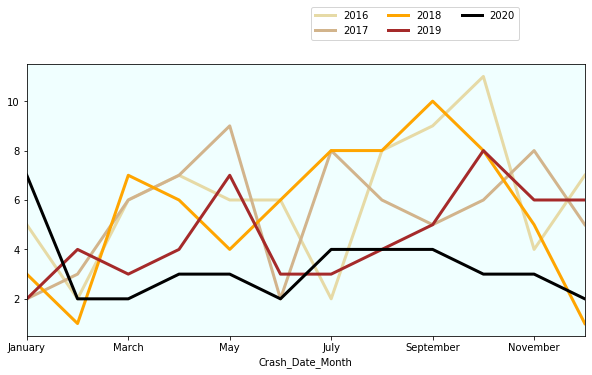

In [91]:
#excluding 2015 and 2021 data as it does not cover full year data for these 2 years
### add marks? line bigger? its a bit messy to look at

month = ['January','February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Creating color parameters
colors = ("#E6DAA6", "tan", "orange",
          "brown", "black")

c = pd.crosstab(Crash_cleaned['Crash_Date_Month'], Crash_cleaned['Crash_Date_Year'])
c = c.reindex(month)
fig = c[[2016, 2017, 2018, 2019, 2020]].plot(color = colors, linewidth =3.0)
plt.legend(loc="center left", bbox_to_anchor=(0.5, 1.15), ncol=3)
# seaborn.lineplot() = 3
fig.set_facecolor('#F0FFFF')
# fig.patch.set_facecolor('xkcd:mint green')

### 2. Crashes vs. Traffic Control Type

2.1 Crash occurrence at different traffic control type
The purpose of analyzing traffic control type is to compare the likelihood of crashes at each type of Traffic control intersections.
The result is assumable: intersection with no control present seems to be more dangerous than the others. 
However, there’s one limitation of the data-set which makes it difficult jump to the conclusion - missing information about the total umber of each Control type intersection in Raleigh. The result is most ideally concluded by the percentage, i.e., comparison of each traffic control type on (count of crashes at each traffic control type)/(number of each traffic control type)

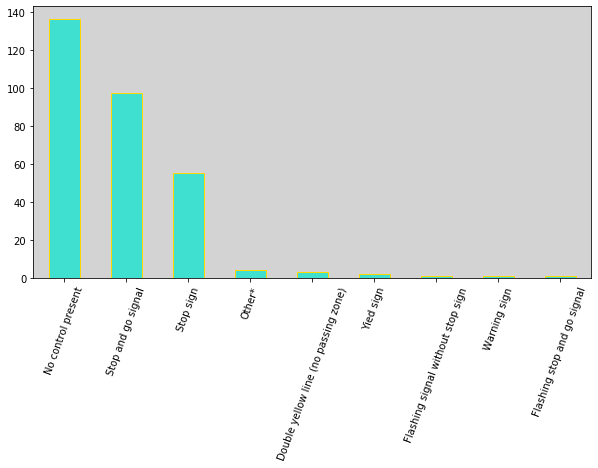

In [92]:
#label is not working?? tried lable tried x=
#possible to add line indicating each year?
count_controltype=Crash_cleaned['TrafficControlType'].value_counts()

controltype = count_controltype.dropna()

# controltype

figb = controltype.plot.bar(x = 'Traffic Control Type', color=('turquoise'), edgecolor='gold')

plt.xticks(rotation=70)

figb.set_facecolor('lightgrey')



2.2 Distribution of Accumulated contribution per Traffic Control Type
Analysis: 
- For the year of 2016 to 2019, we see that biggest distributors matches with previous graph
- Year 2020, an increase in all other distributors, and a drop with ‘No control present’
Since in year 2020, total crash number dropped tremendously, one hypothesis would be in 2020 the city has set up signals or signs at many intersections which used to be ‘No control present’ to improve the traffic safety at these intersections

([0, 1, 2, 3, 4, 5, 6, 7, 8], <a list of 9 Text xticklabel objects>)

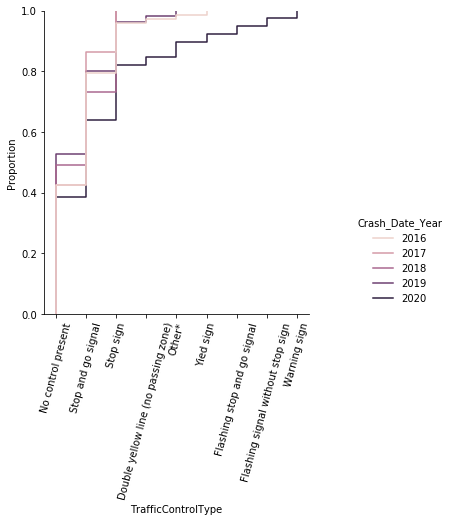

In [93]:
sns.displot(Crash_cleaned, x="TrafficControlType", hue="Crash_Date_Year", kind="ecdf", color = 'dark2')
plt.xticks(rotation=75)

### 3. Crash Severity & Injury Levels

Crash Severity measurement is greatly dependent on injury levels
Injury is categorized as 5 levels: Killed; Type a Injury (severely injured); Type b Injury (injured); Type c Injury (mild injury); No Injury; Injury Unknown;
With only 3 killed cases through 2016 to 2020, the fatality rate is extremely low (0.7%). Also count of severely injured is pretty little (4.2%). No one was injured in almost half of the crashes. Based on these data, it’s reasonable to believe that, to some extend, Raleigh is a friendly and safe city for bikers.

In [94]:
#get the count of each injury level
killed = Crash_cleaned['killed']
type_a_injury = Crash_cleaned['type_a_injury']
type_b_injury = Crash_cleaned['type_b_injury']
type_c_injury = Crash_cleaned['type_c_injury']
no_injury = Crash_cleaned['no_injury']
injury_unknown = Crash_cleaned['injury_unknown']

killed_no = 0
for k in killed:
    if k == 1:
        killed_no = killed_no +1
    else:
        killed_no = killed_no + 0
print('killed:', killed_no)
        
type_a = 0
for a in type_a_injury:
    if a == 1:
        type_a = type_a +1
    else:
        type_a = type_a + 0
print('type_a_injury:', type_a)

type_b = 0
for b in type_b_injury:
    if b == 1:
        type_b = type_b +1
    else:
        type_b = type_b + 0
print('type_b_injury:', type_b)

type_c = 0
for c in type_c_injury:
    if c == 1:
        type_c = type_c +1
    else:
        type_c = type_c + 0
print('type_c_injury:', type_c)

none_injury = 0
for n in no_injury:
    if n == 1:
        none_injury = none_injury +1
    else:
        none_injury = none_injury + 0
print('no_injury:', none_injury)

unkown = 0
for u in injury_unknown:
    if u == 1:
        unkown = unkown +1
    else:
        unkown = unkown + 0
print('injury unknown:', unkown)

killed: 3
type_a_injury: 19
type_b_injury: 128
type_c_injury: 94
no_injury: 194
injury unknown: 12


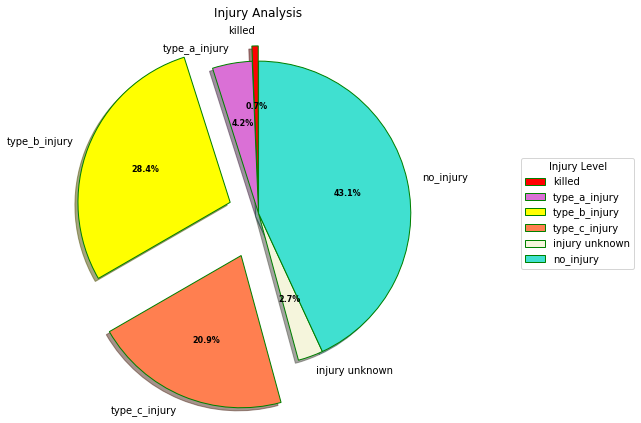

In [95]:
#injury analysis - bar chart
  
# Creating dataset
Injury_Level = ['killed', 'type_a_injury', 'type_b_injury', 
        'type_c_injury', 'injury unknown', 'no_injury']
  
data_injury = [3, 19, 128, 94, 12, 194]
  
  
# Creating explode data
explode = (0.1, 0.0, 0.2, 0.3, 0.0, 0.0)
  
# Creating color parameters
colors = ( "red", "orchid", "yellow",
          "coral", "beige", "turquoise")
  
# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
  
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%".format(pct, absolute)
  
# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data_injury, 
                                  autopct = lambda pct: func(pct, data_injury),
                                  explode = explode, 
                                  labels = Injury_Level,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))
  
# Adding legend
ax.legend(wedges, Injury_Level,
          title ="Injury Level",
          loc ="center right",
          bbox_to_anchor =(1, 0, 0.5, 1))
  
plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Injury Analysis")

# show plot
plt.show()

### 4. Crashes vs. Location to Road

Most accidents happen on or off Roadway and the occurrence of such kind is predictable

#### Limitation of the data-set

On Roadway and Off Roadway are combined together, there would for sure be more insight if these 2 are separated as different categories.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text xticklabel objects>)

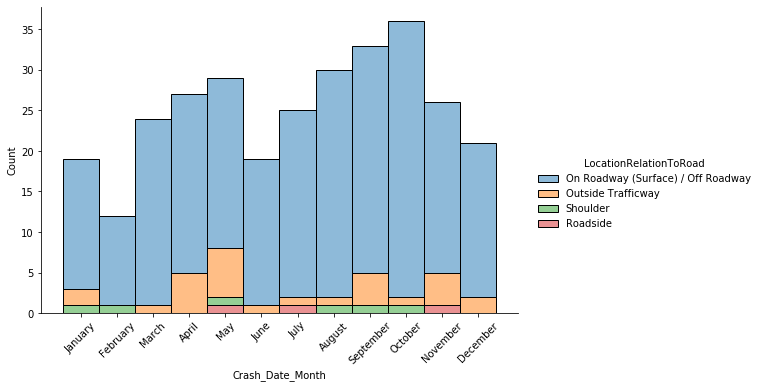

In [96]:
# 2016-2020 how to add a gap between each bar?

sns.displot(x='Crash_Date_Month', hue='LocationRelationToRoad', multiple="stack", alpha=0.5, aspect = 1.5, data=Crash_cleaned)
plt.xticks(rotation=45)
# plt.tight_layout(h_pad=2)
# plt.legend(loc="center right", bbox_to_anchor=(0.5, 1.15), ncol=2)

### 5. Heatmap

#### 5.1 Heat map for 2016 to 2020

Goal is to have an understanding of the geographic locations where crashes happen more frequently. Heat map was chosen to achieve that goal. 
The nature of Heat Map makes it not really specific when we look at year 2016 to 2020 altogether, though we can tell that the crashes take place more in the downtown area, where the population is more dens. Other than that, not much can be dug here. 

In [98]:
Crash_yearcount=Crash_cleaned['Crash_Date_Year'].value_counts()

# Crash_map = Crash_cleaned[(Crash_cleaned['Crash_Date_Year'] == 2021) | (Crash['Crash_Date_Year'] == 2020)]

# Crash_2years

Crash_yearcount

2016    73
2018    67
2017    67
2019    55
2020    39
Name: Crash_Date_Year, dtype: int64

In [99]:
#heatmap for 2016-2020

from folium.plugins import HeatMap

map_6y = [] # create an empty list


for index, crash in Crash_cleaned.iterrows():
    # For each row in our data, we append (add) a [latitude, longitude] list to the heatmap_data list
    map_6y.append([crash['Y'], crash['X']])
    #map_2021.notnull()
   # heatmap_2021 = [x for x in map_2021 if str(x) != 'nan']
    #heatmap_2021=map_2021.dropna()
    #map_2021[].notnull()
heat_map_6y = pd.DataFrame(map_6y)

#print(heat_map)

heatmap_6y = heat_map_6y.dropna()

heatmap_6y

# Now we create a new map
m = folium.Map(location=[35.787743, -78.64], zoom_start=12.5)

# Now, a heatmap
Crash_heatmap = HeatMap(heatmap_6y)

# Crash_heatmap

# We add the heat map to the map m1
Crash_heatmap.add_to(m)

# Now let's show the map
m

#### 5.2 Heat map for 2020 

Thus data of 2020 were extracted so we could have a better view.
Compared with previous heat map, we see the distribution of the heat somewhat changed
This may be a supporting evidence for our previous hypothesis of the city putting up traffic signs / signals at the ‘no control presented’ areas

In [100]:
#heatmap for 2020


Crash_2020 = Crash[Crash['Crash_Date_Year'] == 2020]


map_2020 = [] # create an empty list


for index, crash in Crash_2020.iterrows():
    # For each row in our data, we append (add) a [latitude, longitude] list to the heatmap_data list
    map_2020.append([crash['Y'], crash['X']])
    #map_2021.notnull()
   # heatmap_2021 = [x for x in map_2021 if str(x) != 'nan']
    #heatmap_2021=map_2021.dropna()
    #map_2021[].notnull()
heat_map = pd.DataFrame(map_2020)

#print(heat_map)

heatmap_2020 = heat_map.dropna()

heatmap_2020

# Now we create a new map
m1 = folium.Map(location=[35.787743, -78.64], zoom_start=12.5)

# Now, a heatmap
Crash_heatmap = HeatMap(heatmap_2020)

# Crash_heatmap

# We add the heat map to the map m1
Crash_heatmap.add_to(m1)

# Now let's show the map
m1

#### Limitation of this data-set

It only includes the number of crashes involving cyclists, but it does not contain the cyclists and vehicle number comparison in different areas of the city or during different time periods. This means that it would be difficult to truly know whether for certain areas, i.e. near campus or cbd, there’s more crashes only because there’s more traffic (more cyclists, pedestrian and more cars). And in less populated parts of the city, low crash rate cannot prove that it’s safer to bike there.

#### Limitation of my approach

I would aim for an interactive visual rather than extracting a year out manually. Plan to explore the Python Bokeh and see if it’s workable (during winter holiday).

### 6. Crash vs. Time

I was originally interested in exploring the correlation between crash and sun glare. I suspect more crashes happen when there's strong sunlight. 
One article to backup my hypothesis: 
With data from signalized intersections of Tucson, Arizona, an empirical investigation is performed here to assess how sun glare affects intersection safety. The task is performed by comparing and contrasting crashes that are possibly affected by morning and evening sun-glare with those that are unaffected by glare. Sun rise and sun set data, obtained from National Oceanic and Atmospheric Association (NOAA) is used and windows of worst possible glare are computed. 
Result shows:
• Eastbound traffic in morning and west bound traffic in evening showed more crashes.
• Sun glare is found to be worst in early spring and fall and the least during summer.
• Right angle and rear end crashes are found to be more than expected during glare.
• Sun glare is found to have no effect on crash severities.
From <Sun glare and road safety: An empirical investigation of intersection crashes> By Sudeshna Mitra
(https://www.sciencedirect.com/science/article/abs/pii/S0925753514001386)
 
However how to define the time of the day with sun glare is way to complicated. So I decided to divide one day into 4 time periods: daytime, dawn, dusk, nighttime. And analyze in which period there’s more crashes and whether there’s any pattern to it.

In [101]:
from astral import LocationInfo
from astral.sun import sun

#make DateOfCrash column datetime; Get rid of the localization (UTC tz); Add local tz.
Crash_cleaned['DateOfCrash'] = pd.to_datetime(Crash_cleaned['DateOfCrash'])
# Crash_cleaned['DateOfCrash'] = Crash_cleaned['DateOfCrash'].dt.tz_localize(None)
Crash_cleaned['DateOfCrash'] = Crash_cleaned['DateOfCrash'].dt.tz_convert('America/New_York')

#add a new column YMD for the crash date
Crash_cleaned['YMD']= Crash_cleaned['DateOfCrash'].dt.date

#using astral to get sunrise, sunset, dawn, dusk info
loc = LocationInfo(name='Raleigh', region='NC, USA', timezone='America/New_York',
                   latitude=35.787743, longitude=-78.644257)

for index, row in Crash_cleaned.iterrows():
    day = row['YMD'] 
    s = sun(loc.observer, date=day, tzinfo=loc.timezone)
    Crash_cleaned.loc[index, 'dawn']=s['dawn']
    Crash_cleaned.loc[index, 'dusk']=s['dusk']
    Crash_cleaned.loc[index, 'sunset']=s['sunset']
    Crash_cleaned.loc[index, 'sunrise']=s['sunrise']
Crash_cleaned.head()

# s = sun(loc.observer, date=datetime.date(2021, 11, 18), tzinfo=loc.timezone)
# for key in ['dawn', 'dusk', 'noon', 'sunrise', 'sunset']:
#     print(f'{key:10s}:', s[key])


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.p

,X,Y,OBJECTID,key_crash,DateOfCrash,LocalUse,LocationRelationToRoad,LocationInNearIndicator,LocationCity,LocationCounty,...,injury_unknown,LocationLatitude,LocationLongitude,YMD,dawn,dusk,sunset,sunrise,time_of_the_day,hour
70,-78.6730,35.7912,24441,146665,2016-01-06 23:36:00-05:00,P16001025,On Roadway (Surface) / Off Roadway,In,RALEIGH,Wake,...,0,35.7912,-78.6730,2016-01-06,2016-01-06 06:56:35.472786-05:00,2016-01-06 17:44:08.608645-05:00,2016-01-06 17:15:22.022784-05:00,2016-01-06 07:25:21.853435-05:00,,23
71,-78.6717,35.7886,24443,146667,2016-01-07 01:20:00-05:00,P16001054,On Roadway (Surface) / Off Roadway,In,RALEIGH,Wake,...,0,35.7886,-78.6717,2016-01-07,2016-01-07 06:56:38.476761-05:00,2016-01-07 17:44:58.508098-05:00,2016-01-07 17:16:14.154481-05:00,2016-01-07 07:25:22.609157-05:00,,1
72,-78.6706,35.7883,24672,146903,2016-01-10 19:01:00-05:00,P16001748,On Roadway (Surface) / Off Roadway,In,RALEIGH,Wake,...,0,35.7883,-78.6706,2016-01-10,2016-01-10 06:56:36.440424-05:00,2016-01-10 17:47:33.258285-05:00,2016-01-10 17:18:56.254519-05:00,2016-01-10 07:25:13.171895-05:00,,19
73,-78.6417,35.7805,24893,147125,2016-01-13 22:18:00-05:00,P16002347,On Roadway (Surface) / Off Roadway,In,RALEIGH,Wake,...,0,35.7805,-78.6417,2016-01-13,2016-01-13 06:56:17.729906-05:00,2016-01-13 17:50:14.647593-05:00,2016-01-13 17:21:45.870779-05:00,2016-01-13 07:24:46.178316-05:00,,22
74,-78.6872,35.7843,25892,148133,2016-01-30 16:15:00-05:00,P16005326,Outside Trafficway,In,RALEIGH,Wake,...,0,35.7843,-78.6872,2016-01-30,2016-01-30 06:49:21.985896-05:00,2016-01-30 18:06:40.379424-05:00,2016-01-30 17:39:07.795539-05:00,2016-01-30 07:16:53.807156-05:00,,16


In [125]:
#identify whether each crash belong to sun-glare period
crashdate=Crash_cleaned['DateOfCrash']
# crashdate.head()

Crash_cleaned['time_of_the_day'] = ""

for index, row in Crash_cleaned.iterrows():
    crashtime = row['DateOfCrash']
    dusktime = row['dawn']
    sunsettime = row['sunset']
    dawntime = row['dawn']
    sunrisetime = row['sunrise']
    glare = row['time_of_the_day']
    if crashtime <=dusktime and crashtime >= sunsettime:
        Crash_cleaned.loc[index, 'time_of_the_day']='dusk'
    elif crashtime <=sunrisetime and crashtime >= dawntime:
        Crash_cleaned.loc[index, 'time_of_the_day']='dawn'
    elif crashtime > sunrisetime and crashtime < sunsettime:
        Crash_cleaned.loc[index, 'time_of_the_day']='daytime'
    elif crashtime > dusktime or crashtime < dawntime:
        Crash_cleaned.loc[index, 'time_of_the_day']='nighttime'
    else:
        Crash_cleaned.loc[index, 'time_of_the_day']='error'
  
Crash_cleaned['time_of_the_day'].value_counts()
# Crash_cleaned['time_of_the_day'].describe()      

# outputpath='/Users/tangyan/Desktop/490/Project ideas/with_glare_data.csv'
# Crash_cleaned.to_csv(outputpath, sep=',', index = True, header = True)
#     day = row['YMD']
#     s = sun(loc.observer, date=day, tzinfo=loc.timezone)
#     Crash_cleaned.loc[index, 'dawn']=s['dawn']
#     Crash_cleaned.loc[index, 'dusk']=s['dusk']
#     Crash_cleaned.loc[index, 'sunset']=s['sunset']
#     Crash_cleaned.loc[index, 'sunrise']=s['sunrise']
# Crash_cleaned.head()

# for x in crashdate:
#      if x >= sunset and x<=dusk:
#             Crash_cleaned.loc['Y', 'set']=s['dawn']


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


nighttime    161
daytime      139
dawn           1
Name: time_of_the_day, dtype: int64

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


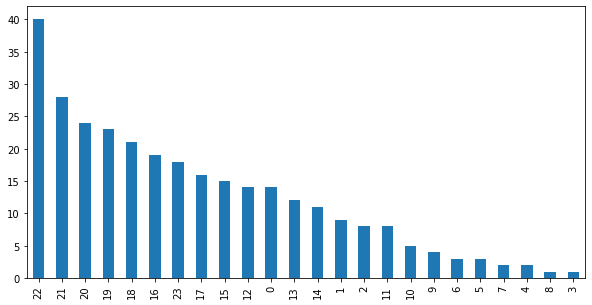

In [126]:
Crash_cleaned['hour']=Crash_cleaned['DateOfCrash'].dt.hour
Crash_cleaned['hour'].value_counts().plot.bar()

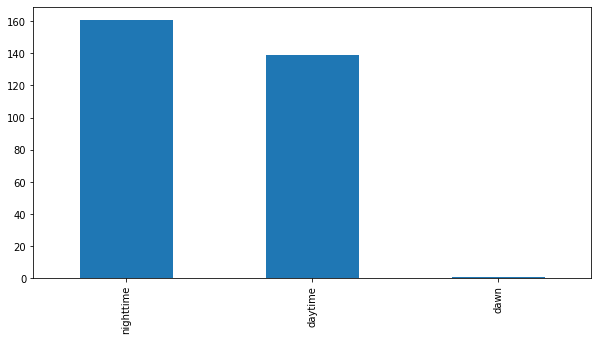

In [127]:
Crash_cleaned['time_of_the_day'].value_counts().plot.bar()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text xticklabel objects>)

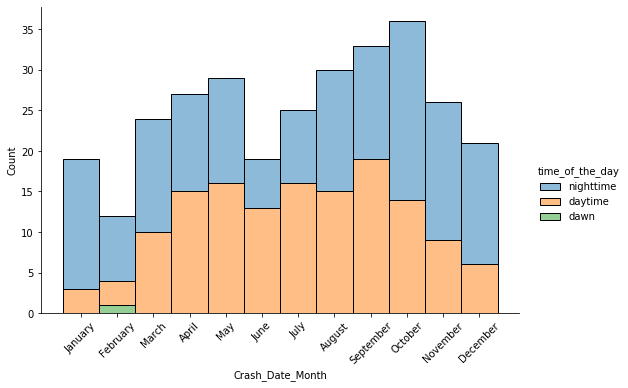

In [128]:
# sun-glare visual

# Crash_cleaned = Crash[(Crash['Crash_Date_Year'] != 2015) & (Crash['Crash_Date_Year'] != 2021)]

sns.displot(x='Crash_Date_Month', hue='time_of_the_day', multiple="stack", alpha=0.5, aspect = 1.5, data=Crash_cleaned)
plt.xticks(rotation=45)

The plot indicates that we only have very few crashes happen during dusk or dawn, this somehow got me a little surprised as I was expecting a much greater number but if we further do normalization and take into consideration of the road directions or traffic directions we may have more meaningful insights.

In general:
- from April to September, more crashes during daytime than night time
- while from mid-autumn to early Spring, it is the opposite. This does make sense since longer night time in winter. 

In [129]:
df=pd.DataFrame(Crash_cleaned,columns=["Crash_Date_Month","time_of_the_day"])
df.plot(x="Crash_Date_Month", y=["time_of_the_day"], kind="bar",figsize=(9,8))
plt.show()

TypeError: no numeric data to plot